<a id="top"></a> 
# Salinity CalCOFI: Data Clean, Correlation, Visualizations and Folium Map

The CalCOFI data set represents the longest (1949-present) and most complete (more than 50,000 sampling stations) time series of oceanographic and larval fish data in the world. CalCOFI research drew world attention to the biological response to the dramatic Pacific-warming event in 1957-58 and introduced the term “El Niño” into the scientific literature. 

This analysis involves CalCOFI data cleaning, correlation, visualization and folium map.


### Table Of Content
1.  [Data Collection](#coll)<br>

2.  [Understanding the Data](#data)<br>
2.1  [Data Types](#data_info)<br>
2.2  [Statistical Summary](#data_summ)<br>

3.  [Data Cleaning](#prep)<br>
3.1  [Check for NULLs/Duplicates](#prep_nulls)<br>
3.2  [Extract Month/Year from Depth_ID](#prep_extract)<br>
3.3  [Drop columns that cannot be Normalized](#prep_drop)<br>

4.  [Correlations](#corr)<br>
4.1  [Normalization](#corr_norm)<br>
4.2  [Correlation - Salinity](#corr_saln)<br>

5. [Data Visualization](#eda)<br>
5.1  [Salinity Plots](#eda_saln)<br>
5.2  [Distribution Plots - Correlation](#eda_dist)<br>
5.3  [Regression Plots - Correlation](#eda_regr)<br>

6.  [Map - Collection Station Locations](#map)<br>   


---
#  1.  Data Collection <a id="coll"></a>
###  Import Python Libraries

In [1]:
#  Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#  maps
import folium
from folium.plugins import MarkerCluster


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 80)

#  Kaggle directories
'''
import os
print(os.listdir("../input"))
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))
'''

'\nimport os\nprint(os.listdir("../input"))\nfrom subprocess import check_output\nprint(check_output(["ls", "../input"]).decode("utf8"))\n'

###  Load the Datasets

In [2]:
#  bottle.csv contains information on ocean conditions
#  cast.csv   contains information on collecting stations
#df = pd.read_csv('../input/bottle.csv')
df = pd.read_csv('C:/Users/ACER/Desktop/JAVA/Kaggle/data/CalCOFI/bottle.csv')

[go to top of document](#top)     

---
#  2.  Understanding the Data <a id="data"></a>

##  2.1  Data Types<a id="data_info"></a>
-  **Categorical data** - collection station information - for map
-  **Numerical data** - scientific data


The collection station locations will be used for the Folium map, but the main attributes for this analysis will be:

*  **Depth_ID**  - extract months and years
*  **Salnty**  - Salinity in g of salt per kg of water (g/kg).  _Target_ variable

In [3]:
df.shape

(864863, 74)

##  2.2  Statistical Summary <a id="data_summ"></a>
Summarize descriptive statistics of the dataset for *numerical* and *categorical* features. 

**Statistical Summary - NUMERICAL DATA**   
Summarize the central tendency, dispersion and shape of numeric features, excluding categorical and NaN values.

In [4]:
df.describe()   #  NUMERICAL DATA

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,864863.000000,853900.000000,23127.000000,817509.000000,74914.000000,673755.000000,184676.000000,65823.00000,217797.000000,225272.000000,639166.000000,225271.000000,639170.000000,413317.000000,451786.000000,354091.000000,510866.000000,337576.000000,529474.000000,337403.000000,529933.000000,64962.000000,808299.000000,14432.000000,12760.000000,848605.000000,14414.000000,12742.000000,848623.000000,22649.000000,20457.000000,840440.000000,22650.000000,20457.000000,840439.000000,18651.000000,864863.000000,853900.000000,818816.000000,817509.000000,812007.000000,812092.000000,818206.000000,696201.000000,666448.000000,354099.000000,413325.000000,337411.000000,337584.000000,64982.000000,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,4.700273,2.017148,7.471829,2.716787,7.945057,8.999996,8.755615,8.46701,8.793487,0.450185,8.999848,0.198553,8.999844,1.564747,8.999320,26.606587,8.999687,0.042316,8.995458,17.302247,8.993122,0.084877,8.947668,9.757704,1.266928,8.999992,9.762613,1.267776,8.999992,0.155295,1.993450,8.999992,8.393530,1.256587,8.999992,18.356509,226.832495,10.799697,10.842295,33.840295,25.811010,220.938918,0.431763,3.392498,57.192940,26.606862,1.564736,17.302188,0.042336,0.084851,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,1.877428,0.148498,1.483097,0.450559,1.415355,0.003655,0.810973,1.11778,0.892111,1.208570,0.012318,0.376543,0.012507,1.035966,0.026895,27.648190,0.018768,0.104196,0.077426,14.581958,0.131516,0.273061,0.508844,23.983492,0.442372,0.002872,25.064529,0.442817,0.002872,0.224953,0.080671,0.002886,21.516374,0.436760,0.002886,29.852839,316.050007,4.243829,4.236435,0.462978,1.124645,93.483703,0.382336,2.073271,37.060537,27.648403,1.035973,14.581998,0.104201,0.273022,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,3.000000,1.000000,6.000000,2.000000,6.000000,6.000000,6.000000,6.00000,2.000000,-0.001000,8.000000,-3.890000,8.000000,0.000000,4.000000,0.000000,4.000000,0.000000,4.000000,-0.400000,4.000000,0.000000,4.000000,-0.240000,1.000000,8.000000,-0.200000,1.000000,8.000000,-0.010000,1.000000,8.000000,-0.220000,1.000000,8.000000,0.000000,0.000000,1.440000,0.000000,4.570000,20.934000,0.400000,0.000000,-0.010000,-0.100000,0.000000,0.000000,-0.400000,0.000000,0.000000,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,3.000000,2.000000,6.000000,2.000000,6.000000,9.000000,9.000000,9.00000,9.000000,0.050000,9.000000,0.050000,9.000000,0.470000,9.000000,3.110000,9.000000,0.000000,9.000000,0.600000,9.000000,0.000000,9.000000,0.930000,1.000000,9.000000,0.930000,1.000000,9.000000,0.060000,2.000000,9.000000,0.980000,1.000000,9.000000,0.280000,46.000000,7.680000,7.740000,33.488000,24.960000,143.700000,0.130000,1.360000,21.200000,3.100000,0.470000,0.600000,0.000000,0.000000,

**Statistical Summary - CATEGORICAL DATA**   
Summarize the count, uniqueness and frequency of categorical features, excluding numerical values.

In [5]:
df.describe(include=['O'])   #  CATEGORICAL DATA

,Sta_ID,Depth_ID,IncTim,DIC Quality Comment
count,864863,864863,14437,55
unique,2634,864850,199,37
top,090.0 045.0,20-16045S-MX-110-1421-06670900-0026A-3,12/30/1899 05:45:00,CTD Bottle Misfire; DIC sample compromised. C...
freq,10043,2,325,9


[go to top of document](#top)     

---
#  3.  Data Cleaning <a id="prep"></a>
Clean the data before begining any type of analysis.

## 3.1  Check for NULLs/Duplicates <a id="prep_nulls"></a>
Cleaning up the NULL and duplicate values in the dataset:

*  3.1.1  Check for NULL percentages
*  3.1.2  Drop attributes with more then 30% data missing
*  3.1.3  Fill remaining NULLs with **mean** values
*  3.1.4  Re-check NULL Percentages
*  3.1.5  Check for duplicated

###  3.1.1  Check for NULL percentages

In [6]:
nulls = df.isnull().sum().sort_values(ascending = False)
prcet = round(nulls/len(df)*100,2)

df_null = pd.DataFrame(columns =  ['Attr','Total','Percent'])
df_null.Attr  = nulls.index
df_null.Total = nulls.values
df_null.Percent = prcet.values
print(df_null.head(20))

                   Attr   Total  Percent
0                   pH2  864853   100.00
1   DIC Quality Comment  864808    99.99
2                   pH1  864779    99.99
3                  DIC2  864639    99.97
4                   TA2  864629    99.97
5                  DIC1  862864    99.77
6                   TA1  862779    99.76
7                C14A2p  852121    98.53
8                C14A1p  852103    98.52
9                C14As2  850449    98.33
10               C14As1  850431    98.33
11               IncTim  850426    98.33
12               LightP  846212    97.84
13               DarkAp  844406    97.63
14               MeanAp  844406    97.63
15               DarkAs  842214    97.38
16               MeanAs  842213    97.38
17               T_qual  841736    97.33
18                NH3uM  799901    92.49
19                R_NH4  799881    92.49


###  3.1.2  Drop attributes with more then 30% data missing

In [7]:
for i in df_null.Attr[df_null['Percent'] > 30]:
    df = df.drop([i], axis=1)
    #print(df.shape,i)

###  3.1.3  Fill remaining NULLs with **mode** values
Some attributes have more than one mode.  Take mean of the multiple modes for the 'fillna' value.

In [8]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        df[i].fillna(df[i].mode().mean(), inplace=True)
        #print('filled',i)

###  3.1.4  Re-check NULL Percentages
Shows attributes for that can be used for EDA and Correlation.

In [9]:
nulls = df.isnull().sum().sort_values(ascending = False)
prcet = round(nulls/len(df)*100,2)

df_null = pd.DataFrame(columns =  ['Attr','Total','Percent'])
df_null.Attr  = nulls.index
df_null.Total = nulls.values
df_null.Percent = prcet.values
print(df_null.head())

       Attr  Total  Percent
0    R_PRES      0      0.0
1   R_O2Sat      0      0.0
2   Btl_Cnt      0      0.0
3    Sta_ID      0      0.0
4  Depth_ID      0      0.0


###  3.1.5  Check for Duplicated values

In [10]:
print('COUNT OF DUPLICATES:  {}'.format(df.duplicated().sum()))

COUNT OF DUPLICATES:  0


## 3.2  Extract Month/Year from Depth_ID <a id="prep_extract"></a>
_cast.csv_ file has the month/year data, but due to the size of the _bottle.csv_, it's be easier to extract it from here.

In [11]:
#  Depth_ID = [Century]-[YY][MM][ShipCode]-etc
#  19-4903CR-HY-060-0930-05400560-0020A-7
df['Year'] = (df['Depth_ID'].str.split('-', expand=True)[0] + \
                df['Depth_ID'].str.split('-', expand=True)[1]). \
                map(lambda x: str(x)[:4])
df['Month'] = (df['Depth_ID'].str.split('-', expand=True)[1]). \
                 map(lambda x: str(x)[2:4])
                 
df[['Depth_ID','Year','Month']].head(10)

,Depth_ID,Year,Month
0,19-4903CR-HY-060-0930-05400560-0000A-3,1949,03
1,19-4903CR-HY-060-0930-05400560-0008A-3,1949,03
2,19-4903CR-HY-060-0930-05400560-0010A-7,1949,03
3,19-4903CR-HY-060-0930-05400560-0019A-3,1949,03
4,19-4903CR-HY-060-0930-05400560-0020A-7,1949,03
5,19-4903CR-HY-060-0930-05400560-0030A-7,1949,03
6,19-4903CR-HY-060-0930-05400560-0039A-3,1949,03
7,19-4903CR-HY-060-0930-05400560-0050A-7,1949,03
8,19-4903CR-HY-060-0930-05400560-0058A-3,1949,03
9,19-4903CR-HY-060-0930-05400560-0075A-7,1949,03


## 3.3  Drop columns that cannot be Normalized <a id="prep_drop"></a>
Dropping columns that cannot be normalized.
   - Cst_Cnt   Auto-numbered Cast Count
   - Btl_Cnt   Auto-numbered Bottle count
   - Sta_ID    CalCOFI Line and Station
   - Depth_ID  [Century]-[YY][MM][ShipCode]

In [12]:
drop_cols = ['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm','Year','Month']
df_norm = df.drop(drop_cols, axis=1)  #  data for normalization
df_scale = df_norm.copy(deep=True)    #  backup data

[go to top of document](#top)     

---
# 4.  Correlation<a id="corr"></a>
Correlation is a statistical metric for measuring to what extent different variables are interdependent.  In order to perform correlation, we need to first normalize the data.

## 4.1  Normalization<a id="corr_norm"></a>
Normalization is a rescaling of the data from the original range so that all values are within a certain range, typically between 0 and 1. Normalized data is essential in machine learning. Correlation and models will not produce good results if the scales are not standardized.

Data in **df_corr** will be normalized and the **df** data frame will be updated with the encoded and normalized data.

In [13]:
df_scale = StandardScaler().fit_transform(df_scale)

#  create dataframe
df_norm = pd.DataFrame(df_scale, index=df_norm.index, columns=df_norm.columns)

## 4.2  Correlation - Salinity<a id="corr_saln"></a>

In [14]:
df_norm.corr()

#  Drop columns with mode = "0.0".  No impact on correlation
for i in df_norm.columns.tolist():
    if (df_norm[i].mode()[0] == 0.0):
        print(' - ',i,df_norm[i].mode()[0])
        df_norm = df_norm.drop(i,axis=1)

#  Create correlation dataframe
df_corr = pd.DataFrame(columns=['Attributes','Correlation'])
df_corr.Attributes = df_norm.corr()['Salnty'].sort_values(ascending=False).index
df_corr.Correlation = df_norm.corr()['Salnty'].sort_values(ascending=False).values
print(df_corr)

     Attributes  Correlation
0        Salnty     1.000000
1    R_SALINITY     0.997472
2       R_DYNHT     0.662413
3       R_SIGMA     0.569549
4        STheta     0.545147
5       R_Depth     0.529287
6        R_PRES     0.528064
7        RecInd     0.060568
8          NH3q     0.018628
9        Phaqua     0.005455
10       Chlqua     0.005139
11       C14A2q     0.003865
12       C14A1q     0.003865
13       MeanAq     0.003865
14       DarkAq     0.003679
15       P_qual     0.001892
16       T_prec    -0.017962
17       S_prec    -0.096793
18       T_degC    -0.474769
19       R_TEMP    -0.474770
20     R_POTEMP    -0.487599
21  Oxy_µmol/Kg    -0.555258
22      R_O2Sat    -0.612447
23        O2Sat    -0.617832
24       O2ml_L    -0.618206
25         R_O2    -0.618209
26        R_SVA    -0.652126


[go to top of document](#top)     

---
#  5.  Data Visualization <a id="eda"></a>
Some of the attribute values will result in similar plots, i.e. R_O2Sat and O2Sat.  In that case, only one observation will be selected for plotting the distribution and regression plots.  For this project, nine observations were selected.

**df_sample** - dataframe size will be sampled (reduced) in order to have cleaner plots.

In [15]:
#  observations for plotting
plot_attr = ['R_DYNHT', 'R_SIGMA', 'R_Depth', 'RecInd', 'NH3q',  'T_prec', 'T_degC', 'R_POTEMP', 'O2ml_L']

for i in plot_attr:
    if plot_attr[0] == i:
        df_plot = df_corr[df_corr.Attributes == i]
    else:
        df_plot = df_plot.append(df_corr[df_corr.Attributes == i])
print(df_plot)

#  take sample of data for plotting
df_sample = df_norm.sample(n=int(round(len(df)*.002,0)), random_state=0)
print('\n\nPlotting data shape: {}'.format(df_sample.shape))

   Attributes  Correlation
2     R_DYNHT     0.662413
3     R_SIGMA     0.569549
5     R_Depth     0.529287
7      RecInd     0.060568
8        NH3q     0.018628
16     T_prec    -0.017962
18     T_degC    -0.474769
20   R_POTEMP    -0.487599
24     O2ml_L    -0.618206


Plotting data shape: (1730, 27)


##  5.1  Salinity Plots <a id="eda_saln"></a>
Salinity plots will use the complete dataset.

###  5.1.1  Salinity Distribution

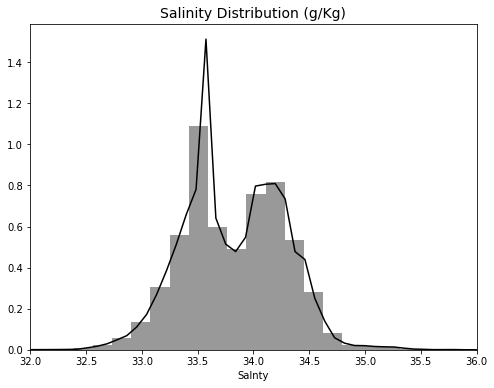

In [22]:
#  Salinity distribution
plt.figure(figsize=(8,6))
plt.xlim([32, 36])#  Salinity distribution
plt.title('Salinity Distribution (g/Kg)', fontsize=14)
sns.distplot(df['Salnty'], color='darkgreen')

###  5.1.2  Plot of Salinity over Time

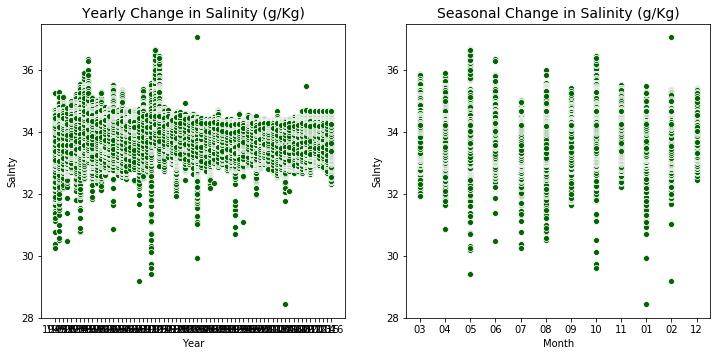

In [17]:
#  Yearly change in Salinity
fig = plt.figure(figsize=(12,6))
fig.autofmt_xdate()
fig.add_subplot(121)
plt.title('Yearly Change in Salinity (g/Kg)', fontsize=14)
sns.scatterplot(data=df, x='Year', y='Salnty', color='darkgreen')

#  Seasonal change in Salinity
fig.add_subplot(122)
plt.title('Seasonal Change in Salinity (g/Kg)', fontsize=14)
sns.scatterplot(data=df, x='Month', y='Salnty', color='darkgreen')
plt.show()

##  5.2  Distribution Plots for Correlations <a id="eda_dist"></a>

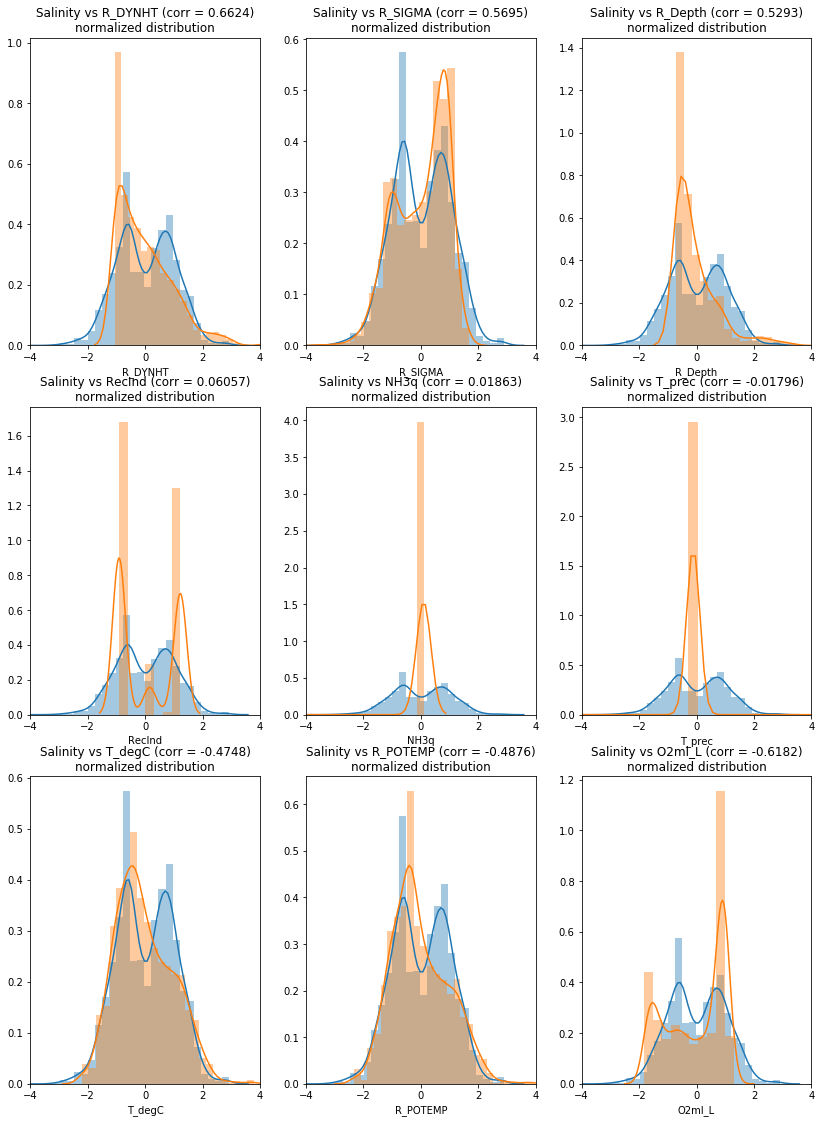

In [18]:
fig = plt.figure(figsize=(14,60))
col = 3
row  = int(len(df_corr.Attributes)/col)
count = 1

for i, j in zip(df_plot.Attributes,df_plot.Correlation):
    fig.add_subplot(row, col, count)
    plt.title('Salinity vs {} (corr = {:.4})\nnormalized distribution'.format(i,j))
    plt.xlim(-4,4)
    sns.distplot(df_sample.Salnty)
    sns.distplot(df_sample[i])
    count = count + 1

plt.show()

##  5.3  Regression Plots - Correlation <a id="eda_regr"></a>

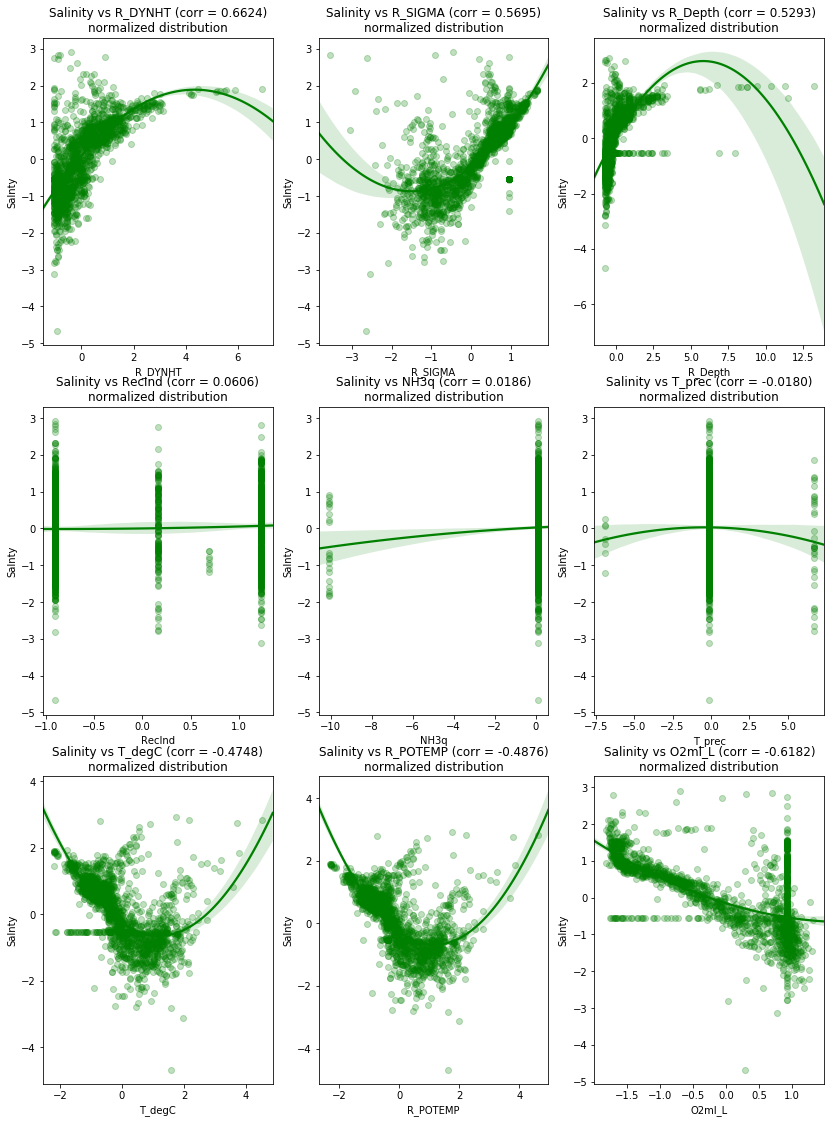

In [19]:
fig = plt.figure(figsize=(14,60))
col = 3
row  = int(len(df_corr.Attributes)/col)
count = 1

for i, j in zip(df_plot.Attributes,df_plot.Correlation):
    fig.add_subplot(row, col, count)
    plt.title('Salinity vs {} (corr = {:.4f})\nnormalized distribution'.format(i,j))
    sns.regplot(x=df_sample[i],y="Salnty",data=df_sample,order=2, scatter_kws={'alpha':0.25},color='green');
    count = count + 1

plt.show()

[go to top of document](#top)     

---
#  6.  Map - Collection Station Locations<a id="map"></a>

In [20]:
#  Load the Dataset
#dfLOC = pd.read_csv('../input/cast.csv')
dfLOC = pd.read_csv('C:/Users/ACER/Desktop/JAVA/Kaggle/data/CalCOFI/cast.csv')

In [21]:
#  select location points
dfLOC = dfLOC[['Lat_Dec', 'Lon_Dec','Date']]
dfLOC = dfLOC.tail(1000)
dfLOC = dfLOC.reset_index(drop=True)  # reset index after tail

#  create folium map
salinity_map   = folium.Map(location=[dfLOC.Lat_Dec.mean(),dfLOC.Lon_Dec.mean()], zoom_start=6)
marker_cluster = MarkerCluster().add_to(salinity_map)

for i in range(len(dfLOC)):
    folium.Marker(location=[dfLOC.Lat_Dec[i],dfLOC.Lon_Dec[i]],
            popup = (dfLOC.Date[i]),         # dates in popups
            icon = folium.Icon(color='green')  # green popup icon
    ).add_to(marker_cluster)

salinity_map.add_child(marker_cluster)
salinity_map         #  display map

---
Please upvote if you found this helpful :-)
###  END
[go to top of document](#top)